## Bribe and Voting report for graviAURA all rounds

---

[Llama Airforce Link](https://llama.airforce/#/bribes/rounds/hh/aura-bal/)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display_functions import display
from IPython.display import HTML
from matplotlib.lines import Line2D

from notebooks.aura_bribes.aura_data import VOTING_ROUNDS

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 20, 10
TABLE_COLUMNS = ["Voting Round", "Total graviAURA bought in $", "Total BADGER bought in $", "graviAURA bought", "BADGER bought",
                 "$/vlAURA total", "$/vlAURA pure bribes", "$/vlAURA Llama", "vlAURA difference"]

data_rows = []
for voting_round in VOTING_ROUNDS:
    llama_vlaura = voting_round['llama_vlaura']
    badger_vlaura = voting_round['$/vlAURA without pools']
    difference_with_llama = round(
        abs(badger_vlaura - llama_vlaura) / ((llama_vlaura + badger_vlaura) / 2) * 100, 3
    )
    data_rows.append([
        voting_round['round'], voting_round['total_graviaura_bought_in_$'], voting_round['total_badger_bought_in_$'],
        voting_round['amount_graviaura_bought'], voting_round['amount_badger_bought'], voting_round['$/vlAURA for total votes'],
        voting_round['$/vlAURA without pools'], voting_round['llama_vlaura'], f"{difference_with_llama}%"
    ])
data_rows.reverse()
dataframe = pd.DataFrame(data=data_rows, columns=TABLE_COLUMNS)
display(HTML(dataframe.to_html(index=False)))


Voting Round,Total graviAURA bought in $,Total BADGER bought in $,graviAURA bought,BADGER bought,$/vlAURA total,$/vlAURA pure bribes,$/vlAURA Llama,vlAURA difference
27th October 2022,16959.24,5913.99,5929.80,1661.23,0.036,0.067,0.066,1.504%
13th October 2022,16943.89,5084.28,6915.87,1540.69,0.0273,0.0600,0.059,1.681%
29th September 2022,22640.234,7509.109,11853.53,2013.17,0.033,0.064,0.063,1.575%
15th September 2022,25066.2,8618.6,12227.39,2427.75,0.037,0.064,0.066,3.077%
1st September 2022,26371.21,8983.14,8618.04,2133.76,0.04,0.069,0.08562,21.498%


## Overall $/vlAURA data

Display performance of Badger graviAURA over different voting rounds

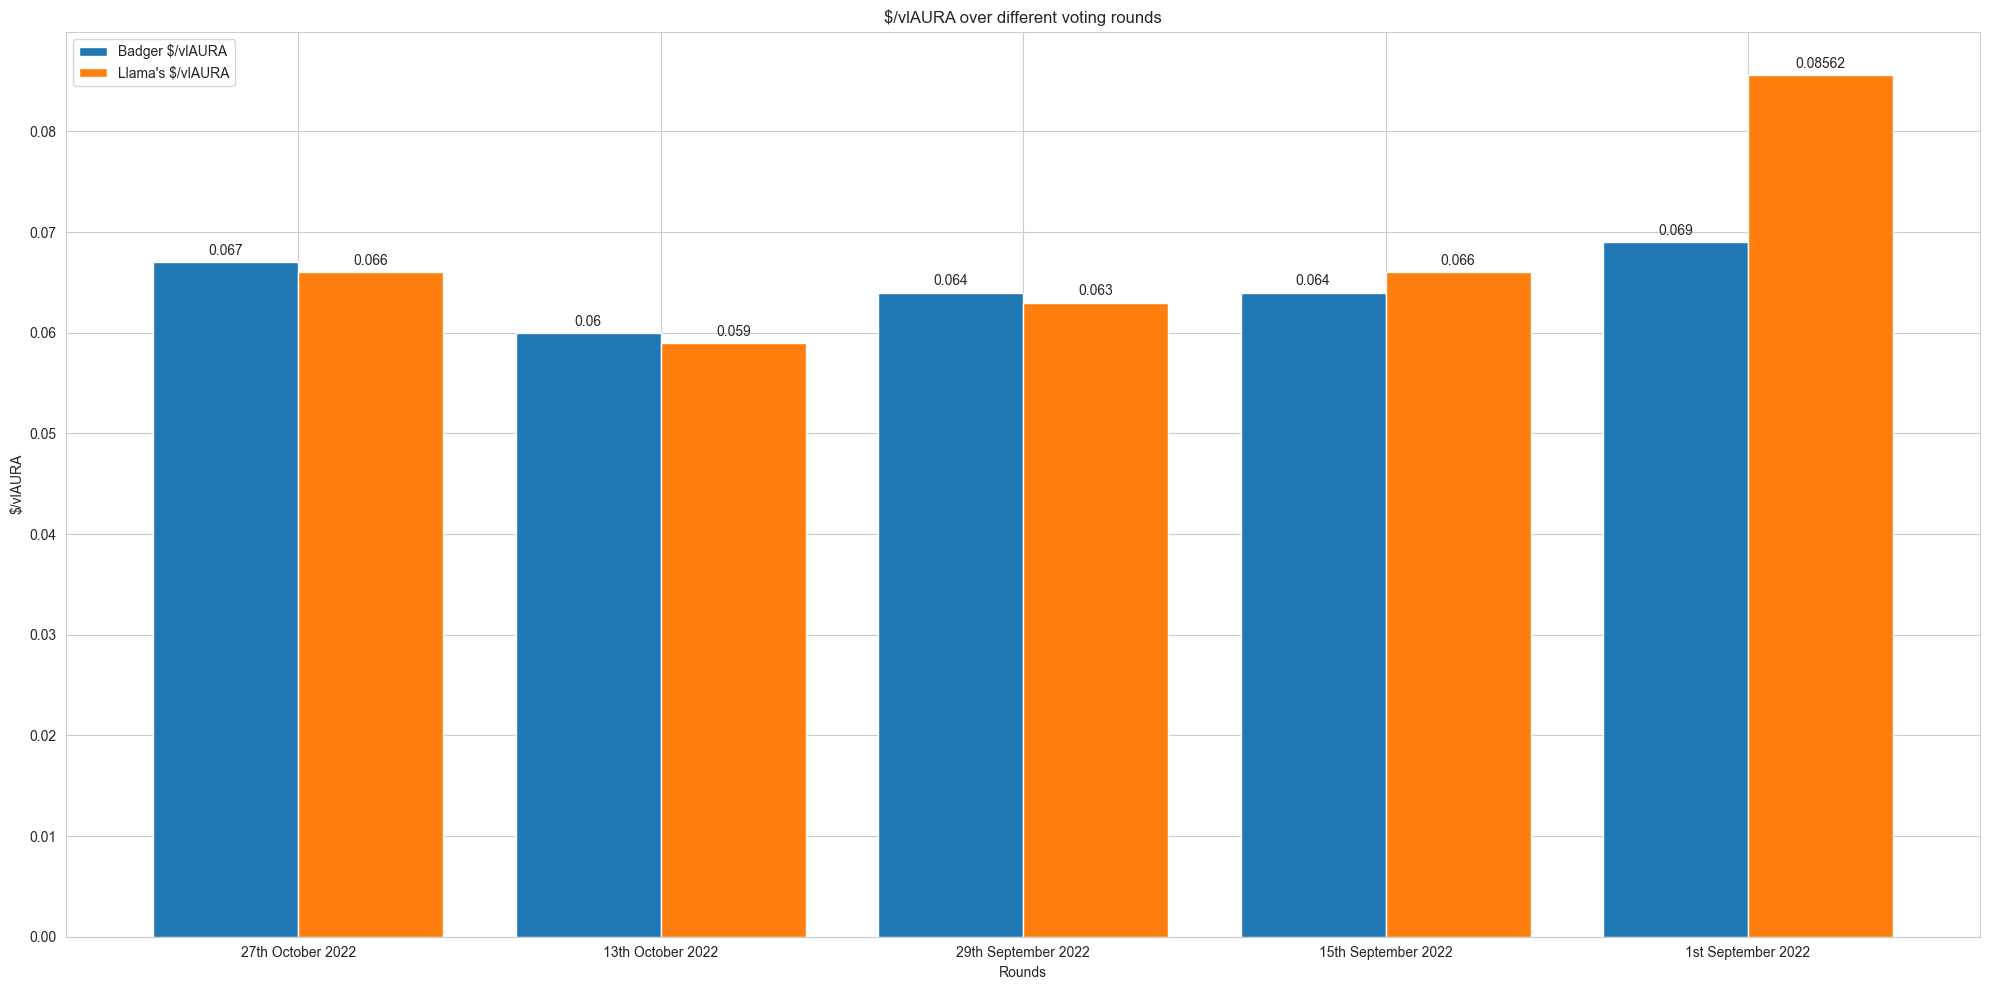

In [4]:
rounds = [dataset[0] for dataset in data_rows]
vlauras = [float(dataset[6]) for dataset in data_rows]
x = np.arange(len(rounds))
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
# creating the bar plot
bar = ax.bar(x - width / 2, vlauras, width, label="Badger $/vlAURA")
bar2 = ax.bar(x + width / 2, dataframe["$/vlAURA Llama"].tolist(), width, label="Llama's $/vlAURA")

ax.set_xlabel("Rounds")
ax.set_ylabel("$/vlAURA")
ax.set_title("$/vlAURA over different voting rounds")
ax.set_xticks(x, rounds)
ax.bar_label(bar, padding=3)
ax.bar_label(bar2, padding=3)
ax.legend()
fig.tight_layout()

plt.show()

## Overall bribes harvested in $


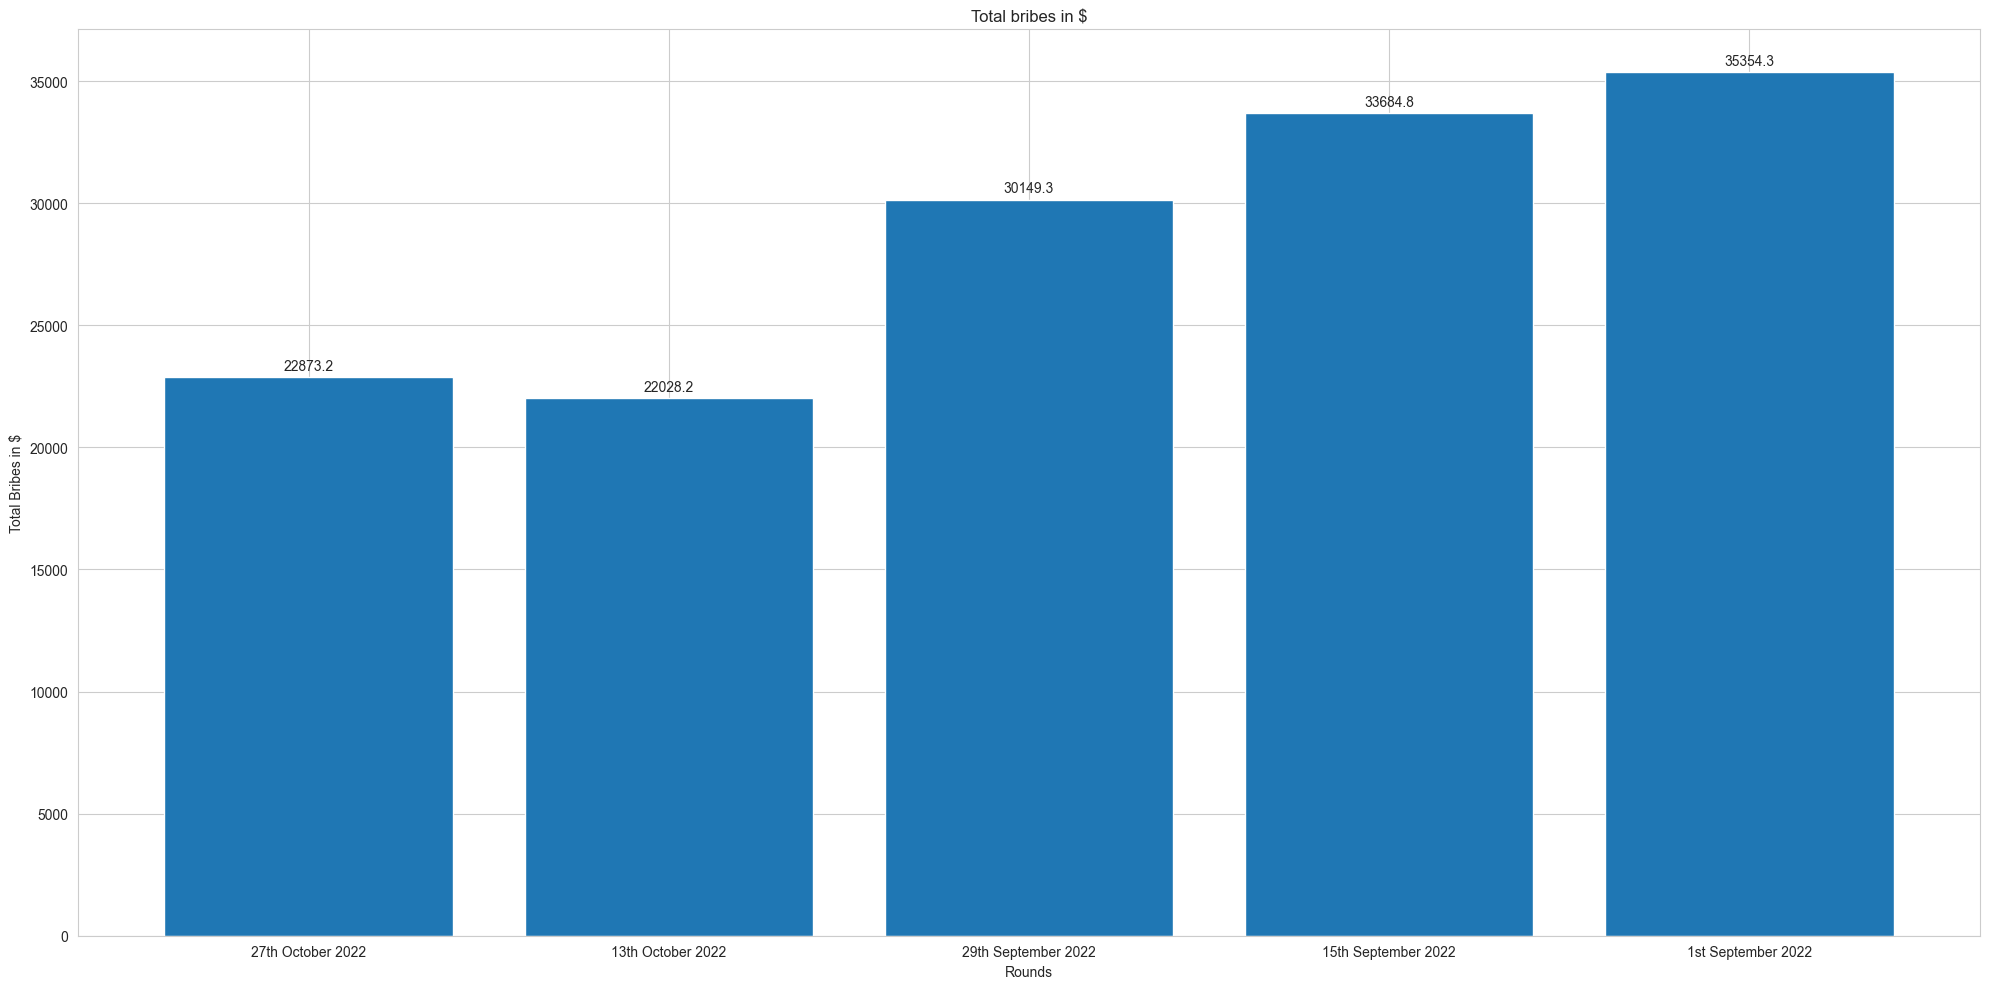

In [3]:
rounds = [dataset[0] for dataset in data_rows]
total_bribes = [float(dataset[1] + dataset[2]) for dataset in data_rows]
x = np.arange(len(rounds))

fig, ax = plt.subplots()
# creating the bar plot
bar = ax.bar(x, total_bribes)
ax.set_xlabel("Rounds")
ax.set_ylabel("Total Bribes in $")
ax.set_title("Total bribes in $")
ax.set_xticks(x, rounds)
ax.bar_label(bar, padding=3)
fig.tight_layout()

plt.show()